
<h1><i> <font color="#000099"><font face="Tribuchet">Resultados</font></font></i></h1>

<p> Nesta seção vamos mostrar o resultados dos modelos em função de dos parâmetros escolhidos usando  <b>Linguagem Julia</b> .</p>

<h3><i> <font color="red">Pacotes: </font></i></h3>
<p>Para a realização dessa tarefefa vamos usar os seguintes pacotes: </p>

In [5]:
using Plots                   # pacote para graficos
using SymPy                   # Pacote para linguagem simbolica
using DifferentialEquations   # pacotes para cálculo
using Calculus


<h3><i> <font color="red">*Breve apresentação: </font></i></h3>

O Câncer é uma doença causada pelo crescimento desordenado e aceleredo das células. Esse crescimento gera uma massa , chama de tumor que pode ser classificada como maligno ou benigno. Com o objetivo de se nutrir, esse tumor , muda o fluxo de sangue do corpo, como consequência , acaba prejudicando outros órgãos vitais

<h3><i> <font color="#000099"><font face="Tribuchet">matemáticos para crescimento do câncer</font></font></i></h3>

<h4><i> <font color="#000099"><font face="Tribuchet">Malthus</font></font></i></h4>
   \begin{equation}
\begin{cases}
  \frac{dP}{dt} =k.P(t)\\
   P(0)=P_0  
\end{cases}
\end{equation}

<h4><i> <font color="#000099"><font face="Tribuchet">Gompertz</font></font></i></h4>:

\begin{equation*}
\begin{cases}
  \frac{dP}{dt} =rPln(\frac{K}{P})-\gamma.c(t).P\\
   P(0)=p_0  \\
   a>0\\
   r>0
\end{cases}
\end{equation*}

<h4><i> <font color="#000099"><font face="Tribuchet">Modelo Von Bertalantffy</font></font></i></h4>:
\begin{equation}
    \frac{dN}{dt} =aN^{\alpha}-bN^{\beta}
\end{equation}


<h4><i> <font color="#000099"><font face="Tribuchet">Tratamento de câncer</font></font></i></h4>:
\begin{equation}
  \frac{dN}{dt}= -rN[ln(\frac{N}{k})]-\gamma c(t)N
\end{equation}

com 

\begin{equation}
    c(t)N=c_0Ste^{-rt}  
\end{equation}
onde S é definida como  função de degrau do seguinte tipo 


 item S=1: considerando o tratamento
   
 item S=0:não considerando o tratamento




<h3><i> <font color="red">*Modelo Malthus </font></i></h3>

<p>lingaguagem simbólica </p>

In [2]:

#tempo t
t=Sym("t")
#constante de crescimento K>0
k=Sym("k")
#população inicial p(0)
p_0=Sym("p_0")
#P(t)=
p=p_0*exp(k*t)


     k*t
p_0*e   

<p>derivadas </p>

In [3]:
dt=diff(p,t) # derive a função p em função de t

       k*t
k*p_0*e   

<h3><i> <font color="#000099"><font face="Tribuchet">Simulação durante um tempo t:</font></font></i></h3>

In [2]:
#modelo de Malthus
# k deve ser pequene
# t deve ser colocado em forma de intervalo t=t_0:t_f

function M(t,k,p_0) 
  p_0*exp.(k*t)      #exp. faz a iteração
end

M (generic function with 1 method)

In [3]:
n=M(1,1,100); # teste 


<h3><i> <font color="#000099"><font face="Tribuchet">Gráficos:</font></font></i></h3>


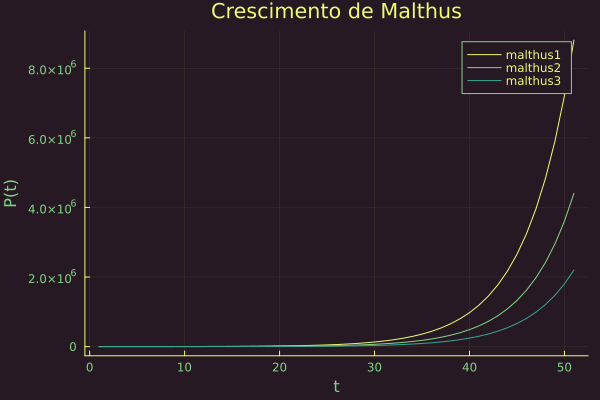

In [8]:
p=M(0:50,0.2,400)
plot(p)
q=M(0:50,0.2,200)
plot(q)
r=M(0:50,0.2,100)
plot(r)

plot(p,title="Crescimento de Malthus",xlabel="t", ylabel="P(t)", label="malthus1")

plot!(q,title="Crescimento de Malthus",xlabel="t", ylabel="P(t)", label="malthus2")#plotar graficos diferentes

plot!(r,title="Crescimento de Malthus",xlabel="t", ylabel="P(t)", label="malthus3")

<h3><i> <font color="red">*Modelo Gompertz  adaptado</font></i></h3>

\begin{equation*}
  N'=-rNln(N/K)-\gamma.c(t)N
\end{equation*}


<h3><i> <font color="#000099"><font face="Tribuchet">Limiar de permanência da Doença</font></font></i></h3>

In [10]:
#EDO simples
#Sem medicação com população abaixo do limite
using DifferentialEquations
r = 2
k = 1000
g = 0.3
c0 = 2*log(0.8)
#Equação do modelo
f(n,p,t) = -r*n*log(n/k)-g*c0*n
#Condições iniciais
u0 = 800
range = (0.0,20.0)
prob = ODEProblem(f,u0,range)
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)
#Plotagem do Modelo
using Plots
plotly()
plot(sol,linewidth=5,title="Solução da EDO",
xaxis="Tempo (t)",yaxis="u(t)",label="Gompertz")

In [11]:
#modelo do artigo
r = 0.006
k = 10^13
g = 0.04
c0 =0.04
#Equação do modelo
f(n,p,t) = -r*n*log(n/k)-g*c0*n
#Condições iniciais
u0 = 200
range = (0.0,2000.0)
prob = ODEProblem(f,u0,range)
sol1= solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8);
#Plotagem do Modelo
using Plots
plotly()
plot(sol1,linewidth=5,title="Solução da EDO",
xaxis="Tempo (t)",yaxis="u(t)",label="Gompertz")


In [12]:
#sem o tratamento
r = 0.006
k = 10^13
g = 0.04
c0 =0.04
#Equação do modelo
f(n,p,t) = -r*n*log(n/k)
#Condições iniciais
u0 = 200
range = (0.0,2000.0)
prob = ODEProblem(f,u0,range)
sol2= solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8);


In [13]:
using Plots
plotly()
plot(sol1,linewidth=5,title="Solução da EDO",
xaxis="Tempo (t)",yaxis="u(t)",label="Gompertz com tratamento")
plot!(sol2,linewidth=5,title="Solução da EDO",
xaxis="Tempo (t)",yaxis="u(t)",label="Gompertz sem tratamento")

In [18]:
u0 = 1500
range = (0.0,20.0)
prob = ODEProblem(f,u0,range)
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)
plotly()
plot(sol,linewidth=5,title="Solução da EDO",
xaxis="Tempo (t)",yaxis="u(t)",label="Gompertz2")

In [17]:
#modelo do artigo
r = 0.006
k = 10^13
g = 0.04
c0 =0.04
#Equação do modelo
f(n,p,t) = -r*n*log(n/k)-g*c0*n
#Condições iniciais
u0 = 10^15
range = (0.0,2000.0)
prob = ODEProblem(f,u0,range)
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)
#Plotagem do Modelo
using Plots
plotly()
plot(sol,linewidth=5,title="Solução da EDO",
xaxis="Tempo (t)",yaxis="u(t)",label="Gompertz")

<h3><i> <font color="#000099"><font face="Tribuchet">Equilíbrio da doença</font></font></i></h3>

Devemos ter :
\begin{equation}
    \frac{dx}{dt}=0
    \end{equation}    

Nesse caso:

\begin{equation*}
 \frac{dN}{dt}=-rN[  \ln(\dfrac{N}{K})] -aN
\end{equation*}

Neste caso, o problema pressupõe um tamanho de infectados N onde a doença
tende a anular a tendência de crescimento.\\
O equilíbrio da equação se dá quando a taxa de variação é dN
dt = 0, ou
seja, $N = C_0$ é uma solução constante:


\begin{equation}
N[-rln(\frac{N}{K})-a]=0
\end{equation} 

Assim temos solução para $N=0$ ou 

\begin{equation}
-rln(\frac{N}{K})-a=0 \to N=ke^{\frac{-a}{r}}
\end{equation} 

O equilíbrio livre de doença é N = 0 e o equilíbrio com a doença presente é
$N = ke^{\frac{-a}{r}}$. Ou seja , os equilíbrios são dados quando:

(a) Equilíbrio livre de doenças ou seja $N_0=0$

(b) Equilíbrio com doença com  $N_1 = ke^{\frac{-a}{r}}$

<h3><i> <font color="#000099"><font face="Tribuchet">Análise de Bifurcações</font></font></i></h3>

Vimos que o equilíbrio será dado por $N_0$ e $N_1$
O número reprodutivo básico $R_0$ é o que determina se a doença vai evoluir .Este limiar é $R_0$=N_1 , assim , se a população inicial for maior que $R_0$ implica $N(t)$ decrescente e se a população inicial for menor $R_0$ então ela sera crescente.  

As birfucações serão determinadas comparando so valores $R_0$  em função dos equilíbrios $N_0$ e $N_1$ (já calculados) 

In [23]:
r1 = 10
k = 1000
N0 = zeros(60,1)
N1 = zeros(60,1)

for var in 1:60
    x = -var/r1
    N1[var] = k*exp.(x)
     
end   

In [24]:
plot(N1,title="Bifurcação Gompertz",xlabel="t", ylabel="P(t)", label="Gompertz1")

plot!(N0,title="Bifurcação Gompertz",xlabel="t", ylabel="P(t)", label="Gompertz0")

<h3><i> <font color="#000099"><font face="Tribuchet">Análise de Sensiblidade: </font></font></i></h3>


Como os parâmetros mudam a forma da curva

In [31]:
r1 = 10
r2 = 15
r3 = 20
k = 1000
N0 = zeros(60,1)
N1 = zeros(60,1)
N2 = zeros(60,1)
N3 = zeros(60,1)
for var in 1:60
    x = -var/r1
    N1[var] = k*exp.(x)
    x = -var/r2
    N2[var] = k*exp.(x)
    x = -var/r3
    N3[var] = k*exp.(x)    
end   


In [32]:
#parametro r
plot(N1,title="Análise de Sensibilidade",xlabel="t", ylabel="P(t)", label="N1,r=10")
plot!(N2,title="Análise de Sensibilidade",xlabel="t", ylabel="P(t)", label="N1,r=15")
plot!(N3,title="Análise de Sensibilidade",xlabel="t", ylabel="P(t)", label="N1,r=20")
plot!(N0,title="Análise de Sensibilidade",xlabel="t", ylabel="P(t)", label="N0")


<h3><i> <font color="#000099"><font face="Tribuchet">Efeito da Medicação sobre o tumor </font></font></i></h3>

Concentração de medicação no tempo t $c(t)-c_0.te^{0.1t}$

In [25]:
#EDO simples
#Com medicação com população abaixo do limite
using DifferentialEquations
r = 2
k = 1000
g = 0.3
c0 = 2*log(0.8)
#Equação do modelo
f(n,p,t) = -r*n*log(n/k)-c0*t*exp(-0.1*t)*n
#Condições iniciais
u0 = 800
range = (0.0,20.0)
prob = ODEProblem(f,u0,range)
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)
#Plotagem do Modelo
using Plots
plotly()
plot(sol,linewidth=5,title="Solução da EDO",
xaxis="Tempo (t)",yaxis="u(t)",label="evolução tratada")


<p> Caso a populão seja maior que a capacidade máxima k</p>

In [21]:
#população acima do limite
using DifferentialEquations
r = 2
k = 1000
g = 0.3
c0 = 2*log(0.8)
#Equação do modelo
f(n,p,t) = -r*n*log(n/k)-c0*t*exp(-0.1*t)*n
#Condições iniciais
u0 = 1500
range = (0.0,20.0)
prob = ODEProblem(f,u0,range)
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)
#Plotagem do Modelo
using Plots
plotly()
plot(sol,linewidth=5,title="Solução da EDO",
xaxis="Tempo (t)",yaxis="u(t)",label="evolução tratada")

<p>População máxima</p>

<h3><i> <font color="#000099"><font face="Tribuchet">Número de reprodução Básico : $R_0$</font></font></i></h3>

<h4><i> <font color="#000099"><font face="Tribuchet">+ Parte 1:Tranformando o modelo em Admensional </font></font></i></h4>

O modelo pode ser transformado em admensional, considerando que este é
tomado em relação a $N_1=ke^{\frac{-a}{r}}$

$n'=\frac{1}{N-1}N'=\frac{1}{N_1}N[-rln(\frac{N}{K})-a]=n[-rln(\frac{N_1}{K}n)-a] $

O modelo completamente admensional é dado por

$\frac{dn}{dt} = −rn.ln(\frac{N_1}{K}n)-an = −rn[ln(\frac{N_1}{K})-ln(n)]
− an = −rn.ln(n)$

Em resumo: 
$\frac{dn}{dt} = −rnln(n)$

<h4><i> <font color="#000099"><font face="Tribuchet">+ Parte 2:Cálculo do R_0 </font></font></i></h4>

Considerando que o valor de n tenha sido normalizado como antes e que
valha que s + i + r = 1 (modelo SIR /Suscetível,Infectados e Recuperados)
nos leva a:

$s'=k-ks-ksln(s+i+r)-csi $

$i'=csi-(\gamma+k)i-kiln(s+i+r)$

$r'=\gamma i-krln(s+i+r)-kr$

Note que $n′ = s′ + i′ + r′= −k(s + i + r) ln(s + i + r) = −kn ln(n)$ e temos
que n tende a 1 quando o tempo vai a infinito.

Assim a segunda equação nos mostra que:

\begin{equation*}
    ci[s-\frac{\gamma +K}{c} - \frac{k}{c}ln(s+i+r)]=0
\end{equation*}

Com isso , fazendo $R_0=\frac{c}{\gamma+k} $ temos:

$s=\frac{1}{R_0}$, $i=\frac{k}{c}(R_0-1)$

Ou seja, Definimos $R_0:=\frac{c}{\gamma+k} $ pois teremos os seguintes resultados:


(a) Se $R_0<1$ , temos a convergência para o equilíbrio sem doença denotado por: $E_0(1,0,0)$ e

(b) Se $R_0>1$ , temos a convergência para o equilíbrio com doença denotado por:

$E_0(\frac{1}{R_1},\frac{k}{c}(R_0-1),1-\frac{1}{R_0}-\frac{k}{c}(R_0-1))$

<h3><i> <font color="red">*Modelo Bertalanffy </font></i></h3>

<h3><i> <font color="#000099"><font face="Tribuchet">Equilíbrio da doença</font></font></i></h3>

Nesta seção, vamos avaliar o equilíbrio no caso de coeficientes constantes
para o modelo de Bertalanffy. A equação diferencial é dada por (13)

Supondo que $\alpha< \beta$, esta equação tem um equilíbrio em:

\begin{equation}
    N^{\alpha}(a-bN^{(\beta -\alpha}))=0
\end{equation}

O equilíbrio ocorre quando  $N_0=0$ ou $N_1 =(\frac{a}{b})^{\frac{1}{\beta-\alpha}}$.
Assim ,o valor de $N_1$ é um limiar e ,se $N>N_1$ a função N(t) é descrente , caso contrário $N<N_1$ a função é crescente
Em resumo teremos os seguintes equilíbrios:

(a) Equilíbrio livre de doenças, ou seja $N_0=0$

(b) Equilíbrio com doença com $N_1 =(\frac{a}{b})^{\frac{1}{\beta-\alpha}}$ 

<h3><i> <font color="#000099"><font face="Tribuchet">Limiar de permanência da Doença</font></font></i></h3>

In [45]:

#EDO simples
#Sem medicação com população abaixo do limite
using DifferentialEquations
a = 10
b = 1
alpha = 2/3
beta = 1
#Equação do modelo
f(n,p,t) = a*n^(alpha)-b*n^(beta)
#Condições iniciais
u0 = 100
range = (0.0,20.0)
prob = ODEProblem(f,u0,range)
sol1 = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)
#Plotagem do Modelo
using Plots
plotly()
plot(sol1,linewidth=5,title="Solução da EDO",
xaxis="Tempo (t)",yaxis="u(t)",label="Bertalanffy1")


<p>população acima do limite k</p>

In [23]:
u0 = 1500
range = (0.0,20.0)
prob = ODEProblem(f,u0,range)
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)
#Plotagem do Modelo
using Plots
plotly()
plot(sol,linewidth=5,title="Solução da EDO",
xaxis="Tempo (t)",yaxis="u(t)",label="Bertalanffy2")


<h3><i> <font color="#000099"><font face="Tribuchet">Análise de bifurcação</font></font></i></h3>

In [29]:
alfa = 1.0
beta = 2.4
N0 = zeros(60)
b1 = 10
N1 = zeros(60)

for var in 1:60
    N1[var] = (var/b1)^(1/(beta-alfa))
    
end 

In [30]:
plot(N1,title="Bifurcação Bertalanffy1",xlabel="t", ylabel="P(t)", label="N1")
plot!(N0,title="Bifurcação Bertalanffy",xlabel="t", ylabel="P(t)", label="N0")

<h3><i> <font color="#000099"><font face="Tribuchet">Análise de Sensibilidade</font></font></i></h3>

In [34]:
alfa = 1.0
beta = 2.4
N0 = zeros(60)
b1 = 10
N1 = zeros(60)
b2 = 15
N2 = zeros(60)
b3 = 20
N3 = zeros(60)
for var in 1:60
    N1[var] = (var/b1)^(1/(beta-alfa))
    N2[var] = (var/b2)^(1/(beta-alfa))
    N3[var] = (var/b3)^(1/(beta-alfa))
end    

In [35]:
plot(N1,title="Bifurcação Bertalanffy1",xlabel="t", ylabel="P(t)", label="N1,b=10")
plot!(N2,title="Bifurcação Bertalanffy",xlabel="t", ylabel="P(t)", label="N2,b=15")
plot!(N3,title="Bifurcação Bertalanffy1",xlabel="t", ylabel="P(t)", label="N3,b=20")
plot!(N0,title="Bifurcação Bertalanffy",xlabel="t", ylabel="P(t)", label="N0")

In [36]:
#beta variavel

alfa = 1.0
b = 10
N0 = zeros(20)
beta1 = 1.6
N1 = zeros(20)
beta2 = 2.5
N2 = zeros(20)
beta3 = 3.4
N3 = zeros(20)
for var in 1:20
    N1[var] = (var/b)^(1/(beta1-alfa))
    N2[var] = (var/b)^(1/(beta2-alfa))
    N3[var] = (var/b)^(1/(beta3-alfa))
end    

In [37]:
plot(N1,title="Análise de Sensibilidade",xlabel="t", ylabel="P(t)", label="N1,b=10")

plot!(N2,title="Sensibilidade Bertalanffy",xlabel="t", ylabel="P(t)", label="N2,b=15")
plot!(N3,title="Bifurcação Bertalanffy",xlabel="t", ylabel="P(t)", label="N3,b=20")
plot!(N0,title="Bifurcação Bertalanffy",xlabel="t", ylabel="P(t)", label="N0")



<h3><i> <font color="#000099"><font face="Tribuchet">Efeito da medicação</font></font></i></h3>

In [46]:

#EDO simples
#Com medicação com população abaixo do limite
12
using DifferentialEquations
a = 10
b = 1
alpha = 2/3
beta = 1
#Equação do modelo
f(n,p,t) = a*n^(alpha)-b*t*exp(-0.1*t)*n^(beta)
#Condições iniciais
u0 = 100
range = (0.0,20.0)
prob = ODEProblem(f,u0,range)
sol2 = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)
#Plotagem do Modelo
using Plots
plotly()
plot(sol2,linewidth=5,title="Solução da EDO",
xaxis="Tempo (t)",yaxis="u(t)",label="com medicação!")

In [47]:
using Plots
plotly()
plot(sol1,linewidth=5,title="Solução da EDO",
xaxis="Tempo (t)",yaxis="u(t)",label="Bertalanffy com tratamento")
plot!(sol2,linewidth=5,title="Solução da EDO",
xaxis="Tempo (t)",yaxis="u(t)",label="Bertalanffy sem tratamento")

<h3><i> <font color="#000099"><font face="Tribuchet">Número de reprodução Básico : $R_0$</font></font></i></h3>

<h4><i> <font color="#000099"><font face="Tribuchet">+ Parte 1:Tranformando o modelo em Admensional </font></font></i></h4>

Para tornar o sistema de Bertalanffy admensional, começamos considerando
que o equilíbrio com população é dado por:
$N_1 =\frac{a^{(\frac{1}{\beta-\alpha})}}{b}$.

A adaptação da equação nos leva a 
\begin{equation}
    \frac{dn}{dt}=\frac{1}{N_1}.\frac{dN}{dt}=(\frac{b}{a})^{\frac{1}{\beta-\alpha}}(aN^{\alpha}-bN^{\beta})=N_1^{-1}[aN^{a}_1n^{a}-bN_1^{\beta}n^{\beta}]
\end{equation}


Aprimorando mais as equações, temos


\begin{equation}
    \frac{dn}{dt}=(aN^{-1}_1N_1^{\alpha}(1-n^{\beta-\alpha})n^{a}
\end{equation}


Se chamamos de $r = aN^{−1}_1 .N^{\alpha}_1$
, resulta na EDO admensional dada por:
    
$\frac{dn}{dt}=r(1-n^{\beta-\alpha})n^{\alpha}$


O valor de n representa a fração da população N1 que a população atual
representa.

<h4><i> <font color="#000099"><font face="Tribuchet">+ Parte 2:Cálculo do $R_0$ </font></font></i></h4>


Considerando que o valor de n tenha sido normalizado como antes e que
valha que s + i + r = 1 nos leva a
$s'=\mu -\mu.s-cs(1-i^{(\beta-\alpha))}i^{\alpha}
$
$i'=c\left[s(1-i^{\beta-\alpha})]-\frac{(\gamma+\mu)}{c}i^{1-\alpha}\right]i^{\alpha}$

A segunda equação nos mostra que :

$c[s(1-i^{\beta-\alpha})-(\gamma+\mu)i^{(1-\alpha)}]i^{\alpha} \to s=\frac{1}{K_0}\frac{i^(1-\alpha)}{(K_0(1-i^{(\beta=\alpha)}))}$

O equilíbrio dinâmico é a solução de


\begin{equation}
    0=\mu-\mu \frac{1}{K_0}\frac{i^{1-\alpha}}{(1-i^(\beta-\alpha))}-\frac{c}{K_0}i \to \frac{\mu}{K_0}[K_0-\frac{i^{1-\alpha}}{(1-i^{\beta-\alpha})}]-\frac{c}{K_0}i=0
\end{equation}


 A relação acima define onde se encontra o $\stackrel{\*}{i}$ do equilíbrio. Observe que:

\begin{equation}
    \mu-c\frac{1}{K_0}i<0 \to i=\frac{\mu}{c}K_0=\mu\frac{K_0}{c}=\mu.R_0
\end{equation}

Ou seja, Definimos $R_0:=\frac{1}{\gamma+\mu} $ pois teremos os seguintes resultados:

(a) Se $R_0<1$ , temos  para todo $\stackrel{*}{i}>0$ onde $\frac{di}{dt}$ é decrescente sempre . A doença é extinta.

(b) Se $R_0>1$ , temos  para todo $\stackrel{*}{i}>0$ onde $\frac{di}{dt}$ é crescente sempre . A doença permanece.

<h3><i> <font color="red">Conclusões e Discusão</font></i></h3>

Os modelos de Gompertz e Bertalanffy têm um movimento semelhante para o crescimento de tumores . A sutiliza pode ser vista nos formatos  das curvas , como nas figuras abaixo:

In [50]:
using DifferentialEquations
r = 2
k = 1000
g = 0.3
c0 = 2*log(0.8)
#Equação do modelo
f(n,p,t) = -r*n*log(n/k)-c0*n
#Condições iniciais
u0 = 1
range = (0.0,20.0)
prob = ODEProblem(f,u0,range)
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)
#Plotagem do Modelo
using Plots
plotly()
plot(sol,linewidth=5,title="Solução da EDO",
xaxis="Tempo (t)",yaxis="u(t)",label="Gompertz")


In [51]:

#EDO simples
#Sem medicação com população abaixo do limite
using DifferentialEquations
a = 10
b = 1
alpha = 2/3
beta = 1
#Equação do modelo
f(n,p,t) = a*n^(alpha)-b*n^(beta)
#Condições iniciais
u0 = 1
range = (0.0,20.0)
prob = ODEProblem(f,u0,range)
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)
#Plotagem do Modelo
using Plots
plotly()
plot(sol,linewidth=5,title="Solução da EDO",
xaxis="Tempo (t)",yaxis="u(t)",label="Bertalanffy")

Assim podemos dizer que o modelo de Gompertz tem uma crescimento
mais explosivo, porque o logaritmo tende a infinito em um pequeno intervalo
de tempo. Apesar de que os parâmetros podem controlar esta explosividade.
Observamos que, em ambos os casos, o modelo implica em uma redução
acentuada do tamanho do tumor, possibilitando caso seja indicado, a remoção
do tumor de forma menos invasiva. 
Observa-se que, pelo modelo,
após um tempo o tumor volta a crescer. Isto acontece, pois o modelo de medicação é
$c(t) = c0te−kt$
que a longo prazo tende a zero como efeito de morte de células
cancerígenas.

As medicações usadas contra o câncer são bastante debilitantes, portanto
elas devem ser aplicadas por um intervalo pequeno de tempo de modo a
otimizar o tratamento. Um uso abusivo da medida poderá trazer colaterais
mais arriscados que a própria vantagem do tratamento. Assim os modelos
são extremamente importantes para o estudo do tratamento mais efetivo da
doença.

Note ainda que o tratamento aplicado em uma doença que se comporta
como o modelo de Gompertz diminui o tamanho do tumor até um tamanho
controlado tumor. Já um modelo de Bertalanffy implica que o tumor chegaria
até bem perto da extinção. Isto se deve ao fato do modelo de Gompertz ter
um crescimento mais agressivo.

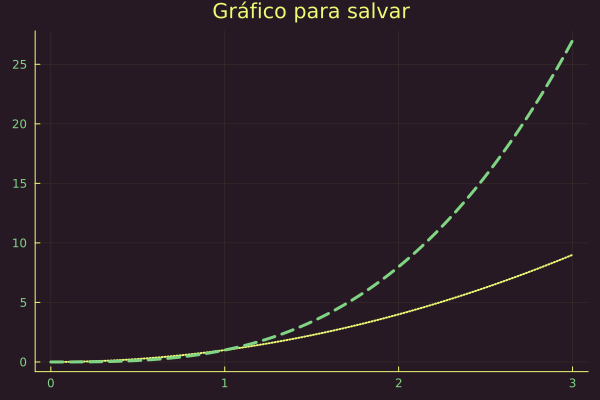

In [7]:
x = 0 : 0.01 : 3
y = x.^2
w = x.^3
theme(:lime)
p = plot(x,[y w],ls = [:dot :dash],lw = [2 3], leg=false)
p = plot!(title="Gráfico para salvar")

savefig(p,"nome_do_grafico.png")

p
